In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
# nltk.download('wordnet')
# nltk.download('omw-1.4')


from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud
import seaborn as sns


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import LatentDirichletAllocation

# import googletrans
# from googletrans import Translator

# Preprocessing

In [3]:
#whole dataframe
def get_data(artist_id_input):
    total_df = pd.read_csv('data/indie_final_dataframe')
    df = total_df[total_df['artist_id']==int(artist_id_input)][['artist_name', 'song_name', 'year', 'lyrics']]
    return df

def clean_text(text):
    manual_sw = ['그','내','난','나는','나를','너를','너의','너와','더','내게','내가','oh','amp','im','이렇게','이제','너는','니가','할','또','네가','na','수','날','아','게','그대','그대는','널','네','것','더','건','그대의','언제나','다','이제는','그녀의','위해','같은','아','있는','이','yeah','마','듯','니','youre','ye','ohh','두','eh','사이니까','will','오예','너무','너랑','ah','좀','woo','자꾸','쉭','u','나의','s','아','네','안','la','으','거야','babe','아아아아아','t','올','ya','gray','m','하지','돼','la','넌','너','그런','너에게','속에','엉','woo','inside','부비대','정말','around','수도','u','꼭','두','1','우린','나','있어','너무나','순','없는','아직도','마치','앞','항상','함께','않아','하지만','막','나에게','정말','다시','바로','싶어','많은','어떻게','걸','one','없어','그대와','let','없잖어','아무것도','팡','아직','우리','을','를','계속','아무','모두','모든','그것이','없는데','got','오예','당장','take','다른','나랑은','수많은','ll','해봐','멀리','그저','기덕','못','받거니','늘','않는','사는','주거니','해야','걸','아닌','이고','못할','da',
        'cha','asunder','이젠','손을','그렇게','해도','baby','해','tickin','수가','하고','gon','go','say','때','것을','채','단','눈을','예','한','cream','christmas','merry','make','know','her의','we는','눈이','볼','바바바','너에게ohh','people','give','90s','wan','하고','대로','줄','잘','알','될','come','acdc','이런','raw','de','que','look''아아아','bye','있을','하는','저','그렇게','쿵','참','말아라','chest에','님아','red','오오','모십니다','maker','우','어떤','we가','waterfalls','tell','음악으로','풍문으로','build','don','talk','보여','say','blue','techno','shoes','와','누가','되어','가는','고개','gim','들어','가지','we는','doo','alway','것만','tell','bie','춤을','green','채팅','먹어','umm','대로','순간','know','그건','나와','cruise','coastal','classic','playa','light','하는','see','그래','eye','time','비가','sun','hi','sun','surf','ive','위에','달이','안엔','hey','지금','우','dive','cause','하나','see','know','에오','길을','맞닿음','보고','될','음','아주','이유','나도','몇','surf']
    #changing to lowercase
    text = text.lower()
    text = text.replace('\r',' ')

    # removing #´s 
    text = re.sub(r'#[A-Za-z0-9]+', ' ', text)
    text = re.sub(r'#', ' ', text)

    #indentation -> space
    text = re.sub(r'\n', ' ', text)

    for punctuation in string.punctuation:
        text = text.replace(punctuation, '') 

    #strip
    text = text.strip()

    #tokenization
    tokens = word_tokenize(text)   
    filtered_words = [w for w in tokens if w not in manual_sw]
    final = " ".join(cat for cat in filtered_words)

    return final

def basic_cleaning(artist_id):
    
    df = get_data(artist_id)
    df['final_lyrics'] = df['Lyric'].apply(clean_text)
    df = df.groupby(['year']).sum()[['final_lyrics']]

    return df


In [8]:
df = pd.read_csv('data/indie_final_df.csv', index_col=0)

In [9]:
df['final_lyrics'] = df['lyrics'].apply(clean_text)
df

,artist_id,artist_name,song_id,song_name,album_id,album,like_count,lyrics,date,year,final_lyrics
0,31236,휘성(Realslow),2275648,가슴 시린 이야기 (feat. 용준형 Of Beast),677972,가슴 시린 이야기,"[14,786]",[세상에 가장 예쁜 거짓말 goodbye goodbye\r\n가슴 찢겨도 뱉는 그 ...,2011-03-15,2011,세상에 가장 예쁜 거짓말 goodbye goodbye 가슴 찢겨도 뱉는 말 good...
1,31236,휘성(Realslow),2063982,결혼까지 생각했어,270770,Realslow Is Back,"[18,843]",[To all My people hellow hellow hellow hellow ...,2010-08-26,2010,to all my hellow hellow hellow hellow my name ...
2,31236,휘성(Realslow),2063984,사랑 그 몹쓸 병,270770,Realslow Is Back,"[2,787]",[곁에 오지 말아요\r\n나를 보지 말아요\r\n단 한번 단 한번의 호흡조차 위험해...,2010-08-26,2010,곁에 오지 말아요 보지 말아요 한번 한번의 호흡조차 위험해 건네오는 인사에 스쳐가는...
3,31236,휘성(Realslow),1700206,Insomnia (불면증),324617,Insomnia (불면증),"[41,145]","[내가 달리는 길은 Love, Love, Love, Love \r\n허나 그 길엔 ...",2009-02-18,2009,달리는 길은 love love love love 허나 길엔 온통 덫 덫 덫 덫 피할...
4,31236,휘성(Realslow),3295630,Special Love,445300,Special Love,"[2,157]",[대화 따위는 필요없어 \r\n서로 눈빛으로 모든 걸 알 수 있어 \r\n뭔가 흐름...,2013-11-29,2013,대화 따위는 필요없어 서로 눈빛으로 뭔가 흐름이 좋아 만남이 주는 기분에 취하고 황...
...,...,...,...,...,...,...,...,...,...,...,...
45,6653,가리온(Garion),30503578,[19금],20022222,금기어,[16],[],2016-12-30,2016,
46,6653,가리온(Garion),3325821,그래서 함께 하는 이유 2013 (inst.),329757,가리온 15주년 기념 앨범 Instrumental,[1],[],2013-12-24,2013,
47,6653,가리온(Garion),31200427,변,20055463,변,[17],[뭐 하냐고? 뭐 하냐고??\r\n(여보세요? 존나 랩해)\r\n가리온 퇴물랩 나이...,2018-08-23,2018,뭐 하냐고 뭐 하냐고 여보세요 존나 랩해 가리온 퇴물랩 나이만 처먹네 음원을 내봐도...
48,6653,가리온(Garion),32050291,그 놈의 음악 (Prod. Jinhu),20036214,그 놈의 음악,[13],[비싼 건 손도 못 대던 시절\r\n먹고 살 수만 있어도 인정\r\n알바는 옵션이 ...,2020-10-28,2020,비싼 손도 대던 시절 먹고 살 수만 있어도 인정 알바는 옵션이 기본 돈만 주면 뭐든...


In [10]:
df_filtered = df[['artist_id','artist_name', 'song_name', 'year', 'final_lyrics']]
df_filtered.head()

,artist_id,artist_name,song_name,year,final_lyrics
0,31236,휘성(Realslow),가슴 시린 이야기 (feat. 용준형 Of Beast),2011,세상에 가장 예쁜 거짓말 goodbye goodbye 가슴 찢겨도 뱉는 말 good...
1,31236,휘성(Realslow),결혼까지 생각했어,2010,to all my hellow hellow hellow hellow my name ...
2,31236,휘성(Realslow),사랑 그 몹쓸 병,2010,곁에 오지 말아요 보지 말아요 한번 한번의 호흡조차 위험해 건네오는 인사에 스쳐가는...
3,31236,휘성(Realslow),Insomnia (불면증),2009,달리는 길은 love love love love 허나 길엔 온통 덫 덫 덫 덫 피할...
4,31236,휘성(Realslow),Special Love,2013,대화 따위는 필요없어 서로 눈빛으로 뭔가 흐름이 좋아 만남이 주는 기분에 취하고 황...


In [13]:
df_filtered.to_csv('data/indie_final_df_cleaned.csv')

# tf-idf

In [36]:
#by_year
df_by_year = df_filtered.groupby('year')[['final_lyrics']].sum()

In [37]:
df_by_year = df_by_year.loc[2000:]
df_by_year

,final_lyrics
year,
2000,사랑을 말하지 못했어 마지막 감는 순간에도 동안 행복했었지만 i we must go...
2001,언제부터 사랑이었는지 알아채는 요령 없나요 맘이 변해서 사랑하게 되는지 나만 훔쳐보...
2002,잠이와 오는 잠에 나른해지고 무거워 무거운 눈꺼풀이 싫어 좋은데 딱 한가지 좋은 것...
2003,많이 모질었었죠 당신께 같지 않은 말 땜에 놀랬겠죠 편할 날이 없었죠 틀렸던 걸까 ...
2004,많이 닮아 같으니 어렸을 적 그리던 네모습과 순수한 열정을 소망해오던 푸른 사슴의 ...
2005,시간이 빨리 흘러서 애꿎은 시계 마저 부수고 사랑한 날을 거꾸로 세며 그대만 기다리...
2006,돌아누워도 감고 감아도 어김없이 안에 떠오르죠 까만 하늘에 손톱달이 뜨듯 어제 만큼...
2007,just fall in love its all about love 만남이란 상상만으...
2008,사랑해선 사람이라고 그만 어서 돌아서라고 미련조차 등을 떠미는 가봐 지워내도 지워지...


In [60]:
vectorizer = TfidfVectorizer(min_df = 0.01, max_df = 0.95, max_features = 500) #, ngram_range = (2,2)
X = vectorizer.fit_transform(df_by_year['final_lyrics'])
vectorized_ngram = pd.DataFrame(X.toarray(),
columns = vectorizer.get_feature_names_out())

In [61]:
lyrics_vectorised_df = vectorized_ngram

In [62]:
new_df = lyrics_vectorised_df.transpose()
new_df['sum'] = new_df.sum(axis=1)
new_df = new_df.reset_index()

# keywords = new_df[new_df['index'].str.contains(keyword_)]
result = new_df[['index', 'sum']].sort_values(by='sum', ascending = False)

In [64]:
result.head()

,index,sum
132,the way,0.954712
193,your eyes,0.953357
19,be my,0.929073
113,of my,0.919212
171,you dont,0.913009
34,do it,0.907002
57,have to,0.904547
143,tonight tonight,0.891274
158,when you,0.877637
128,the night,0.873133


# Wordcloud

In [74]:
df_by_year = df_by_year.loc[2000:]
df_by_year

,final_lyrics
year,
2000,사랑을 말하지 못했어 마지막 감는 순간에도 동안 행복했었지만 i we must go...
2001,언제부터 사랑이었는지 알아채는 요령 없나요 맘이 변해서 사랑하게 되는지 나만 훔쳐보...
2002,잠이와 오는 잠에 나른해지고 무거워 무거운 눈꺼풀이 싫어 좋은데 딱 한가지 좋은 것...
2003,많이 모질었었죠 당신께 같지 않은 말 땜에 놀랬겠죠 편할 날이 없었죠 틀렸던 걸까 ...
2004,많이 닮아 같으니 어렸을 적 그리던 네모습과 순수한 열정을 소망해오던 푸른 사슴의 ...
2005,시간이 빨리 흘러서 애꿎은 시계 마저 부수고 사랑한 날을 거꾸로 세며 그대만 기다리...
2006,돌아누워도 감고 감아도 어김없이 안에 떠오르죠 까만 하늘에 손톱달이 뜨듯 어제 만큼...
2007,just fall in love its all about love 만남이란 상상만으...
2008,사랑해선 사람이라고 그만 어서 돌아서라고 미련조차 등을 떠미는 가봐 지워내도 지워지...


In [77]:
def simple_wordcloud_2(total):
    
    wordcloud = WordCloud(font_path = 'LINESeedKR-Rg.otf', width = 1000, height = 500, colormap='RdPu_r', 
                        max_words=150, background_color= 'white', collocations = False).generate(total)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
#     wordcloud.to_file(f"final_wordcloud_png/{artist_id}_wordcloud.png")
    

In [78]:
def simple_wordcloud(artist_id):
    df = basic_cleaning(artist_id)
    
    total_lyrics = " ".join(cat for cat in df.final_lyrics)
    
    wordcloud = WordCloud(font_path = 'LINESeedKR-Rg.otf', width = 1000, height = 500, colormap='RdPu_r', 
                        max_words=70, background_color= 'white', collocations = False).generate(total_lyrics)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
#     wordcloud.to_file(f"final_wordcloud_png/{artist_id}_wordcloud.png")
    

In [79]:
def wordcloud_by_year(artist_id):
    
    df = basic_cleaning(artist_id)
    
    def by_year(df):
        lyrics_of_years = []
        for i in range(len(df)):
            one_year = " ".join(cat for cat in df.iloc[i, :])
            lyrics_of_years.append(one_year)
        return lyrics_of_years


    lyric_lst = by_year(df)
    year_lst = [i for i in df.index]
    
    for lyric in lyric_lst:
        word_cloud = WordCloud(font_path='Binggrae', width = 1000, height = 500, 
        colormap='BuPu', max_words=100, collocations = False).generate(lyric)

        plt.figure(figsize = (10,8))
        plt.imshow(word_cloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(year_lst[lyric_lst.index(lyric)])
        plt.show()
        
        

## total wordcloud

In [16]:
indie_total_df

,Unnamed: 0,artist_id,artist_name,song_name,year,final_lyrics
0,0,31236,휘성(Realslow),가슴 시린 이야기 (feat. 용준형 Of Beast),2011,세상에 가장 예쁜 거짓말 goodbye goodbye 가슴 찢겨도 뱉는 말 good...
1,1,31236,휘성(Realslow),결혼까지 생각했어,2010,to all my hellow hellow hellow hellow my name ...
2,2,31236,휘성(Realslow),사랑 그 몹쓸 병,2010,곁에 오지 말아요 보지 말아요 한번 한번의 호흡조차 위험해 건네오는 인사에 스쳐가는...
3,3,31236,휘성(Realslow),Insomnia (불면증),2009,달리는 길은 love love love love 허나 길엔 온통 덫 덫 덫 덫 피할...
4,4,31236,휘성(Realslow),Special Love,2013,대화 따위는 필요없어 서로 눈빛으로 뭔가 흐름이 좋아 만남이 주는 기분에 취하고 황...
...,...,...,...,...,...,...
6037,45,6653,가리온(Garion),[19금],2016,NaN
6038,46,6653,가리온(Garion),그래서 함께 하는 이유 2013 (inst.),2013,NaN
6039,47,6653,가리온(Garion),변,2018,뭐 하냐고 뭐 하냐고 여보세요 존나 랩해 가리온 퇴물랩 나이만 처먹네 음원을 내봐도...
6040,48,6653,가리온(Garion),그 놈의 음악 (Prod. Jinhu),2020,비싼 손도 대던 시절 먹고 살 수만 있어도 인정 알바는 옵션이 기본 돈만 주면 뭐든...


In [22]:
indie_total_df = pd.read_csv('data/indie_final_dataframe')
indie_total_df = indie_total_df[['artist_x', 'artist_id', 'song_name', 'year', 'Lyric']]
indie_total_df['final_lyrics'] = indie_total_df.Lyric.apply(clean_text)
indie_total_df.drop(columns = ['Lyric'], inplace = True)
indie_total_df

,artist_x,artist_id,song_name,year,final_lyrics
0,굴소년단,80023059,이유없이,2010,주저하고 있었네 집으로 길에 멍하니 유치한 대사처럼 어디로도 가고 싶지 않았네 어디...
1,굴소년단,80023059,니가 뭔데,2010,어차피 올거라면 빨리 오지 뭔데 뜸을 들여 전화를 해보아도 받지 않고 왜 속을 썩여...
2,굴소년단,80023059,참치,2010,참치 김밥을 자주 먹는데 오늘 따라 참치가 배속에서 추네 바다에서 시작되었고 참치는...
3,굴소년단,80023059,세미스타,2010,당신의 이야기 눈빛 미소 짓는 모습은 거기에 기분 유어 뮤직 유어 기타 당신의 목소...
4,굴소년단,80023059,미소 짓는 사람,2010,검은 눈동자 어깨 위로 내려 앉은 머리결 이유도 설명도 필요 이야기여야 밤을 달려 ...
...,...,...,...,...,...
8546,Dept(뎁트),20020910,"Who Are You (Feat. J.O.Y, GARETH FERNANDEZ)",2022,who are you 누구인가요 i dont think its 아직은 우리가 to ...
8547,Dept(뎁트),20020910,"Ocean View (Feat. Kelsey Kuan, prettyhappy)",2022,its been too long since i have left my room wh...
8548,Dept(뎁트),20020910,Selfish Love (Feat. Ashley Alisha),2022,i dont need your selfish love 필요 이기적인 사랑 when ...
8549,Dept(뎁트),20020910,As It Is (Feat. Ashley Alisha),2022,sometimes i think of what we are 가끔 우리가 서로에게 무...


In [23]:
total_lyrics = " ".join(cat for cat in indie_total_df.final_lyrics)
# total_lyrics

In [27]:
indie_temp = indie_total_df[['year', 'final_lyrics']]
indie_by_year_df = indie_temp.groupby(['year']).sum()[['final_lyrics']]
indie_by_year_df.dropna(inplace=True)

In [28]:
indie_by_year_df = indie_by_year_df.loc[2008:]
indie_by_year_df

,final_lyrics
year,
2008,소리를 듣고 손길을 느껴 오늘도 흔적 안에 살았죠 모습이 온기를 느껴 오늘도 시간 ...
2009,농담을 하곤 했지 집으로 잠이든 좁은 길에 보며 웃으며 조그만 목소리로 말했지 언젠...
2010,주저하고 있었네 집으로 길에 멍하니 유치한 대사처럼 어디로도 가고 싶지 않았네 어디...
2011,어두워진 밤이면 토요일의 밤이면 가슴은 뜨거워 상상조차 가죽자켓 입고서 거리로 뛰쳐...
2012,처음엔 많이도 힘들었지 인정할 괴로웠지 받아들이고 나니 그게 슬픈 거지 사실은 흩어...
2013,지금까진 전부 잊어 조용히 감고 가둔 벽을 부숴 알고 있었던 모든게 아닌게 될까 될...
2014,천천히 솔직히 금방까진 아니더라도 언젠간 잊혀질 거라고 믿었지 믿고 지금까지 견뎌왔...
2015,그리 오랜 시간이 필요하지도 않았지 가장 친한 친구를 잃었다는 깨닫기까지 누구도 자...
2016,똑같은 하루가 지나갈 뿐 달라지는 없겠지 그랬듯 짓궂은 기억은 다시금 텅 빈 방을 ...


In [29]:
def wc_by_year_2(df):
    def by_year(df):
        lyrics_of_years = []
        for i in range(len(df)):
            one_year = " ".join(cat for cat in df.iloc[i, :])
            lyrics_of_years.append(one_year)
        return lyrics_of_years


    lyric_lst = by_year(df)
    year_lst = [i for i in df.index]

    for lyric in lyric_lst:
        word_cloud = WordCloud(font_path='Binggrae', width = 1000, height = 500, 
        colormap='BuPu', max_words=100, collocations = False).generate(lyric)

        plt.figure(figsize = (10,8))
        plt.imshow(word_cloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(year_lst[lyric_lst.index(lyric)])
        plt.show()
        
        yearr=year_lst[lyric_lst.index(lyric)]
        word_cloud.to_file(f"data/final_wordcloud_png/{yearr}_wordcloud.png")

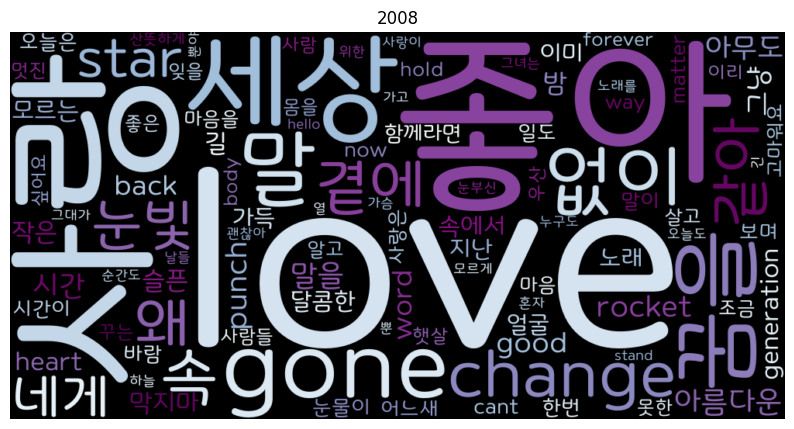

KeyboardInterrupt: 

In [30]:
wc_by_year_2(indie_by_year_df)